# 다중공선성

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

variables = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category', 
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE', 
    'DS1_BMI', 'walk_category'
]

def calculate_vif(df, variables):
    X = df[variables].copy()
    X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

male_vif = calculate_vif(male_final_df, variables)
print("남자 데이터 VIF 결과")
print(male_vif)

print("\n")

female_vif = calculate_vif(female_final_df, variables)
print("여자 데이터 VIF 결과")
print(female_vif)

남자 데이터 VIF 결과
          Feature          VIF
0           const  1178.828421
1         DS1_AGE     1.507129
2         DS1_HTN     1.144192
3         DS1_FDM     1.024239
4         DS1_HIP     3.102316
5       DS1_PULSE     1.043937
6         DS1_SBP     2.400956
7         DS1_DBP     2.331582
8         DS1_PBF     6.109906
9      DS1_MUSCLE     3.310502
10     DS1_VISFAT     4.583747
11        DS1_WHR     1.697799
12  exer_category     1.087119
13  DS1_INCOME_RE     1.363205
14     DS1_EDU_RE     1.357819
15   DS1_MARRY_RE     1.036553
16   DS1_SMOKE_RE     1.053308
17   DS1_DRINK_RE     1.064664
18        DS1_BMI     5.009487
19  walk_category     1.050519


여자 데이터 VIF 결과
          Feature          VIF
0           const  1038.230347
1         DS1_AGE     1.762353
2         DS1_HTN     1.197300
3         DS1_FDM     1.019695
4         DS1_HIP     3.142606
5       DS1_PULSE     1.039135
6         DS1_SBP     2.848742
7         DS1_DBP     2.649898
8         DS1_PBF     7.256148
9      DS

# 통계모델 로지스틱 정규성 & 등분산성 검정

# (왜도/첨도 환인 x ) -> 바로 연속형 정규성 검정 진행

### 범주형

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

# 파일 불러오기
male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")
female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 범주형 변수 리스트
categorical_vars = ['DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 
                    'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'walk_category', 'exer_category','DS1_HTN', 'DS1_FDM']

# 남자 데이터 - 카이제곱 검정
print("==== [남자] 범주형 변수 카이제곱 검정 결과 ====")
for var in categorical_vars:
    contingency_table = pd.crosstab(male_final_df[var], male_final_df['target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{var}: p-value = {p:.4f}")

# 여자 데이터 - 카이제곱 검정
print("\n==== [여자] 범주형 변수 카이제곱 검정 결과 ====")
for var in categorical_vars:
    contingency_table = pd.crosstab(female_final_df[var], female_final_df['target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{var}: p-value = {p:.4f}")


==== [남자] 범주형 변수 카이제곱 검정 결과 ====
DS1_INCOME_RE: p-value = 0.0027
DS1_EDU_RE: p-value = 0.0001
DS1_MARRY_RE: p-value = 0.4243
DS1_SMOKE_RE: p-value = 0.0000
DS1_DRINK_RE: p-value = 0.0494
walk_category: p-value = 0.0002
exer_category: p-value = 0.0002
DS1_HTN: p-value = 0.0000
DS1_FDM: p-value = 0.0000

==== [여자] 범주형 변수 카이제곱 검정 결과 ====
DS1_INCOME_RE: p-value = 0.0000
DS1_EDU_RE: p-value = 0.0000
DS1_MARRY_RE: p-value = 0.0000
DS1_SMOKE_RE: p-value = 0.0924
DS1_DRINK_RE: p-value = 0.0000
walk_category: p-value = 0.0000
exer_category: p-value = 0.0221
DS1_HTN: p-value = 0.0000
DS1_FDM: p-value = 0.0000


In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency

# 파일 불러오기
male_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")
female_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 범주형 변수 리스트
categorical_vars = ['DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 
                    'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'walk_category', 'exer_category', 'DS1_HTN', 'DS1_FDM']

# 공통 처리 함수: 카이제곱 → 유의 변수 → OHE → 로지스틱 회귀
def logistic_pipeline(df, gender_label):
    print(f"\n==== [{gender_label}] 로지스틱 회귀 ====")

    # 1. 카이제곱 검정
    selected_vars = []
    for var in categorical_vars:
        contingency = pd.crosstab(df[var], df['target'])
        _, p, _, _ = chi2_contingency(contingency)
        if p < 0.05:
            selected_vars.append(var)
    
    print(f"선택된 유의 범주형 변수: {selected_vars}")

    # 2. One-Hot Encoding
    X = df[selected_vars]
    y = df['target']
    X_encoded = pd.get_dummies(X, drop_first=True)

    # 3. 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

    # 4. 모델 학습 및 평가
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

# 남자
logistic_pipeline(male_df, "남자")

# 여자
logistic_pipeline(female_df, "여자")



==== [남자] 로지스틱 회귀 ====
선택된 유의 범주형 변수: ['DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'walk_category', 'exer_category', 'DS1_HTN', 'DS1_FDM']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6890
           1       0.00      0.00      0.00       319

    accuracy                           0.96      7209
   macro avg       0.48      0.50      0.49      7209
weighted avg       0.91      0.96      0.93      7209


==== [여자] 로지스틱 회귀 ====
선택된 유의 범주형 변수: ['DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_DRINK_RE', 'walk_category', 'exer_category', 'DS1_HTN', 'DS1_FDM']
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13435
           1       0.00      0.00      0.00       334

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 연속형

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# 파일 불러오기
male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")
female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 연속형 변수 리스트
continuous_vars = [
    'DS1_AGE', 'DS1_HIP', 'DS1_PULSE', 
    'DS1_SBP', 'DS1_DBP', 'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 
    'DS1_WHR', 'DS1_BMI'
]

def analyze_continuous(df, gender_label):
    mannwhitney_vars = []
    print(f"\n==== [{gender_label}] 연속형 변수 분석 ====")
    for var in continuous_vars:
        group0 = df[df['target'] == 0][var].dropna()
        group1 = df[df['target'] == 1][var].dropna()

        # 정규성 검정
        p_shapiro_0 = shapiro(group0)[1]
        p_shapiro_1 = shapiro(group1)[1]
        normal0 = "정규분포 아님" if p_shapiro_0 < 0.05 else "정규분포"
        normal1 = "정규분포 아님" if p_shapiro_1 < 0.05 else "정규분포"
        normal_flag = "o" if (p_shapiro_0 < 0.05 or p_shapiro_1 < 0.05) else "x"

        # 등분산성 검정
        p_levene = levene(group0, group1)[1]
        equal_var_flag = "o" if p_levene < 0.05 else "x"

        # 어떤 검정을 할지
        if normal_flag == "o" or equal_var_flag == "o":
            stat, p_test = mannwhitneyu(group0, group1, alternative='two-sided')
            test_used = "Mann-Whitney U Test"
            mannwhitney_vars.append(var)
        else:
            stat, p_test = ttest_ind(group0, group1, equal_var=True)
            test_used = "T-test"

        # 출력
        print(f"[{var}]")
        print(f"정규성(target=0, p={p_shapiro_0:.4f})={normal0} / 정규성(target=1, p={p_shapiro_1:.4f})={normal1}")
        print(f"등분산성(p={p_levene:.4f})={'등분산 아님' if p_levene < 0.05 else '등분산'}")
        print(f"정규성 깨짐: {normal_flag} / 등분산 깨짐: {equal_var_flag} → {test_used}")
        print(f"=> {test_used} 결과: p-value = {p_test:.4f}\n")

    print(f"※ [{gender_label}] 정규성/등분산 깨져서 Mann-Whitney U Test 수행한 변수 목록")
    print(mannwhitney_vars)
    print("\n")

# 남자
analyze_continuous(male_final_df, "남자")

# 여자
analyze_continuous(female_final_df, "여자")


==== [남자] 연속형 변수 분석 ====
[DS1_AGE]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0001)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_HIP]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0000)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_PULSE]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0000)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_SBP]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.7559)=등분산
정규성 깨짐: o / 등분산 깨짐: x → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_DBP]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.5137)=등분산
정규성 깨짐: o / 등분산 깨짐: x → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_PBF]
정규성(target=0, p=0.0000)=정규분포 아님 /

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 34450.
  res = hypotest_fun_out(*samples, **kwds)


[DS1_MUSCLE]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0004)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0001

[DS1_VISFAT]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0000)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_WHR]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0985)=등분산
정규성 깨짐: o / 등분산 깨짐: x → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_BMI]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0176)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

※ [남자] 정규성/등분산 깨져서 Mann-Whitney U Test 수행한 변수 목록
['DS1_AGE', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'DS1_BMI']



==== [여자] 연속형 변수 분석 ====
[DS1_AGE]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(targe

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 67176.
  res = hypotest_fun_out(*samples, **kwds)


[DS1_PULSE]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0019)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_SBP]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0022)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_DBP]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0747)=등분산
정규성 깨짐: o / 등분산 깨짐: x → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_PBF]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.1901)=정규분포
등분산성(p=0.0037)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_MUSCLE]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0000)=정규분포 아님
등분산성(p=0.0000)=등분산 아님
정규성 깨짐: o / 등분산 깨짐: o → Mann-Whitney U Test
=> Mann-Whitney U Test 결과: p-value = 0.0000

[DS1_VISFAT]
정규성(target=0, p=0.0000)=정규분포 아님 / 정규성(target=1, p=0.0

### 언더샘플링x -> 데이터 분할 -> 스텝와이즈 -> 모델링

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm

# 1. 파일 불러오기
male_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")

# 2. 유의미한 변수 리스트 (p-value 기반 필터링 결과)
male_selected_vars = ['DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP',
                      'DS1_DBP', 'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 
                      'exer_category', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_SMOKE_RE', 
                      'DS1_DRINK_RE', 'DS1_BMI', 'walk_category']

# 3. 데이터 구성 및 더미변수 처리
X_male = male_df[male_selected_vars]
y_male = male_df['target']
X_male_encoded = pd.get_dummies(X_male, drop_first=True)

# 4. 스텝와이즈 함수 정의
def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.1, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.Logit(y, sm.add_constant(X[included + [new_col]])).fit(disp=0)
            new_pval[new_col] = model.pvalues[new_col]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"추가된 변수: {best_feature} (p={best_pval:.4f})")

        model = sm.Logit(y, sm.add_constant(X[included])).fit(disp=0)
        pvals = model.pvalues.iloc[1:]
        worst_pval = pvals.max()
        if worst_pval > threshold_out:
            worst_feature = pvals.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f"제거된 변수: {worst_feature} (p={worst_pval:.4f})")

        if not changed:
            break
    return included

# 5. 스텝와이즈 실행
male_final_vars = stepwise_selection(X_male_encoded, y_male)
print("\n최종 선택된 변수들 (남성):", male_final_vars)

# 6. 데이터 분할 (6:2:2)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_male_encoded[male_final_vars], y_male, test_size=0.2, random_state=42, stratify=y_male)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 * 0.8 = 0.2

# 7. 학습 (Train set)
X_train_const = sm.add_constant(X_train)
male_model_train = sm.Logit(y_train, X_train_const).fit()

# 8. 검증 (Validation set) - 유든 인덱스로 최적 threshold 찾기
X_val_const = sm.add_constant(X_val)
y_val_prob = male_model_train.predict(X_val_const)

fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]
print(f"\n유든 인덱스 기반 최적 임계값: {optimal_threshold:.4f}")

# 9. 테스트 세트 평가
X_test_const = sm.add_constant(X_test)
y_test_prob = male_model_train.predict(X_test_const)
y_test_pred = (y_test_prob >= optimal_threshold).astype(int)

print("\n=== 테스트 세트 성능 평가 (남성, 유든 인덱스 적용) ===")
print(classification_report(y_test, y_test_pred))
print("혼동행렬:")
print(confusion_matrix(y_test, y_test_pred))

# 10. 세부 지표 출력
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"\n정확도 (Accuracy): {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"민감도 (Recall / Sensitivity): {sensitivity:.4f}")
print(f"특이도 (Specificity): {specificity:.4f}")

# 11. 오즈비 출력 (Train set 기준)
male_params = male_model_train.params
male_conf = male_model_train.conf_int()
male_conf.columns = ['2.5%', '97.5%']
male_conf['OR'] = male_params
male_conf['OR'] = np.exp(male_conf['OR'])
male_conf['2.5%'] = np.exp(male_conf['2.5%'])
male_conf['97.5%'] = np.exp(male_conf['97.5%'])

print("\n=== 오즈비 (Odds Ratio)와 95% 신뢰구간 (남성, 학습 데이터 기준) ===")
print(male_conf)


추가된 변수: DS1_PBF (p=0.0000)
추가된 변수: DS1_PULSE (p=0.0000)
추가된 변수: DS1_WHR (p=0.0000)
추가된 변수: DS1_FDM (p=0.0000)
추가된 변수: DS1_SBP (p=0.0000)
추가된 변수: DS1_AGE (p=0.0000)
추가된 변수: DS1_SMOKE_RE (p=0.0000)
추가된 변수: DS1_HTN (p=0.0015)
추가된 변수: walk_category (p=0.0020)
추가된 변수: exer_category (p=0.0168)
추가된 변수: DS1_VISFAT (p=0.0192)
추가된 변수: DS1_DBP (p=0.0210)

최종 선택된 변수들 (남성): ['DS1_PBF', 'DS1_PULSE', 'DS1_WHR', 'DS1_FDM', 'DS1_SBP', 'DS1_AGE', 'DS1_SMOKE_RE', 'DS1_HTN', 'walk_category', 'exer_category', 'DS1_VISFAT', 'DS1_DBP']
Optimization terminated successfully.
         Current function value: 0.169449
         Iterations 8

유든 인덱스 기반 최적 임계값: 0.0388

=== 테스트 세트 성능 평가 (남성, 유든 인덱스 적용) ===
              precision    recall  f1-score   support

           0       0.98      0.58      0.73      6890
           1       0.08      0.74      0.14       319

    accuracy                           0.59      7209
   macro avg       0.53      0.66      0.43      7209
weighted avg       0.94      0.59      0.70

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm

# 1. 파일 불러오기
female_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 2. 유의미한 변수 리스트 (p-value 기반 필터링 결과)
female_selected_vars = ['DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP',
                        'DS1_DBP', 'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 
                        'exer_category', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 
                        'DS1_DRINK_RE', 'DS1_BMI', 'walk_category']

# 3. 데이터 구성 및 더미변수 처리
X_female = female_df[female_selected_vars]
y_female = female_df['target']
X_female_encoded = pd.get_dummies(X_female, drop_first=True)

# 4. 스텝와이즈 함수 정의
def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.1, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.Logit(y, sm.add_constant(X[included + [new_col]])).fit(disp=0)
            new_pval[new_col] = model.pvalues[new_col]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"추가된 변수: {best_feature} (p={best_pval:.4f})")

        model = sm.Logit(y, sm.add_constant(X[included])).fit(disp=0)
        pvals = model.pvalues.iloc[1:]
        worst_pval = pvals.max()
        if worst_pval > threshold_out:
            worst_feature = pvals.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f"제거된 변수: {worst_feature} (p={worst_pval:.4f})")

        if not changed:
            break
    return included

# 5. 스텝와이즈 실행
female_final_vars = stepwise_selection(X_female_encoded, y_female)
print("\n최종 선택된 변수들 (여성):", female_final_vars)

# 6. 데이터 분할 (6:2:2)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_female_encoded[female_final_vars], y_female, test_size=0.2, random_state=42, stratify=y_female)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 x 0.8 = 0.2

# 7. 학습 (Train set)
X_train_const = sm.add_constant(X_train)
female_model_train = sm.Logit(y_train, X_train_const).fit()

# 8. 검증 (Validation set) - 유든 인덱스로 최적 threshold 찾기
X_val_const = sm.add_constant(X_val)
y_val_prob = female_model_train.predict(X_val_const)

fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]
print(f"\n유든 인덱스 기반 최적 임계값: {optimal_threshold:.4f}")

# 9. 테스트 세트 평가
X_test_const = sm.add_constant(X_test)
y_test_prob = female_model_train.predict(X_test_const)
y_test_pred = (y_test_prob >= optimal_threshold).astype(int)

print("\n=== 테스트 세트 성능 평가 (여성, 유든 인덱스 적용) ===")
print(classification_report(y_test, y_test_pred))
print("혼동행렬:")
print(confusion_matrix(y_test, y_test_pred))

# 10. 세부 지표 출력
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"\n정확도 (Accuracy): {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"민감도 (Recall / Sensitivity): {sensitivity:.4f}")
print(f"특이도 (Specificity): {specificity:.4f}")

# 11. 오즈비 출력 (Train set 기준)
female_params = female_model_train.params
female_conf = female_model_train.conf_int()
female_conf.columns = ['2.5%', '97.5%']
female_conf['OR'] = female_params
female_conf['OR'] = np.exp(female_conf['OR'])
female_conf['2.5%'] = np.exp(female_conf['2.5%'])
female_conf['97.5%'] = np.exp(female_conf['97.5%'])

print("\n=== 오즈비 (Odds Ratio)와 95% 신뢰구간 (여성, 학습 데이터 기준) ===")
print(female_conf)


추가된 변수: DS1_BMI (p=0.0000)
추가된 변수: DS1_WHR (p=0.0000)
추가된 변수: DS1_PULSE (p=0.0000)
추가된 변수: DS1_FDM (p=0.0000)
추가된 변수: DS1_AGE (p=0.0000)
추가된 변수: DS1_SBP (p=0.0000)
추가된 변수: DS1_HTN (p=0.0000)
추가된 변수: walk_category (p=0.0016)
추가된 변수: DS1_HIP (p=0.0025)
추가된 변수: DS1_PBF (p=0.0288)
추가된 변수: DS1_MUSCLE (p=0.0003)
추가된 변수: DS1_EDU_RE (p=0.0425)

최종 선택된 변수들 (여성): ['DS1_BMI', 'DS1_WHR', 'DS1_PULSE', 'DS1_FDM', 'DS1_AGE', 'DS1_SBP', 'DS1_HTN', 'walk_category', 'DS1_HIP', 'DS1_PBF', 'DS1_MUSCLE', 'DS1_EDU_RE']
Optimization terminated successfully.
         Current function value: 0.102196
         Iterations 9

유든 인덱스 기반 최적 임계값: 0.0212

=== 테스트 세트 성능 평가 (여성, 유든 인덱스 적용) ===
              precision    recall  f1-score   support

           0       0.99      0.65      0.79     13435
           1       0.05      0.76      0.10       334

    accuracy                           0.66     13769
   macro avg       0.52      0.71      0.44     13769
weighted avg       0.97      0.66      0.77     13769

혼동행렬

### 언더샘플링 -> 데이터 분할 -> 스텝와이즈 -> 모델링

In [2]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm

# 1. 파일 불러오기
male_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")

# 2. 유의미한 변수 리스트 (p-value 기반 필터링 결과)
male_selected_vars = ['DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP',
                      'DS1_DBP', 'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 
                      'exer_category', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_SMOKE_RE', 
                      'DS1_DRINK_RE', 'DS1_BMI', 'walk_category']

# 3. 데이터 구성 및 더미변수 처리
X_male = male_df[male_selected_vars]
y_male = male_df['target']
X_male_encoded = pd.get_dummies(X_male, drop_first=True)

# 4. 언더샘플링
rus = RandomUnderSampler(random_state=42)
X_male_res, y_male_res = rus.fit_resample(X_male_encoded, y_male)

# 5. 스텝와이즈 함수 정의
def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.1, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.Logit(y, sm.add_constant(X[included + [new_col]])).fit(disp=0)
            new_pval[new_col] = model.pvalues[new_col]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"추가된 변수: {best_feature} (p={best_pval:.4f})")

        model = sm.Logit(y, sm.add_constant(X[included])).fit(disp=0)
        pvals = model.pvalues.iloc[1:]
        worst_pval = pvals.max()
        if worst_pval > threshold_out:
            worst_feature = pvals.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f"제거된 변수: {worst_feature} (p={worst_pval:.4f})")

        if not changed:
            break
    return included

# 6. 스텝와이즈 실행
male_final_vars = stepwise_selection(X_male_res, y_male_res)
print("\n최종 선택된 변수들 (남성):", male_final_vars)

# 7. 데이터 분할 (6:2:2)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_male_res[male_final_vars], y_male_res, test_size=0.2, random_state=42, stratify=y_male_res)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 x 0.8 = 0.2

# 8. 학습 (Train set)
X_train_const = sm.add_constant(X_train)
male_model_train = sm.Logit(y_train, X_train_const).fit()

# 9. 검증 (Validation set) - 유든 인덱스로 최적 threshold 찾기
X_val_const = sm.add_constant(X_val)
y_val_prob = male_model_train.predict(X_val_const)

fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]
print(f"\n유든 인덱스 기반 최적 임계값: {optimal_threshold:.4f}")

# 10. 테스트 세트 평가
X_test_const = sm.add_constant(X_test)
y_test_prob = male_model_train.predict(X_test_const)
y_test_pred = (y_test_prob >= optimal_threshold).astype(int)

print("\n=== 테스트 세트 성능 평가 (남성, 언더샘플링 + 유든 인덱스) ===")
print(classification_report(y_test, y_test_pred))
print("혼동행렬:")
print(confusion_matrix(y_test, y_test_pred))

# 11. 세부 지표 출력
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"\n정확도 (Accuracy): {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"민감도 (Recall / Sensitivity): {sensitivity:.4f}")
print(f"특이도 (Specificity): {specificity:.4f}")

# 12. 오즈비 출력 (Train set 기준)
male_params = male_model_train.params
male_conf = male_model_train.conf_int()
male_conf.columns = ['2.5%', '97.5%']
male_conf['OR'] = male_params
male_conf['OR'] = np.exp(male_conf['OR'])
male_conf['2.5%'] = np.exp(male_conf['2.5%'])
male_conf['97.5%'] = np.exp(male_conf['97.5%'])

print("\n=== 오즈비 (Odds Ratio)와 95% 신뢰구간 (남성, 학습 데이터 기준) ===")
print(male_conf)

추가된 변수: DS1_PBF (p=0.0000)
추가된 변수: DS1_WHR (p=0.0000)
추가된 변수: DS1_PULSE (p=0.0000)
추가된 변수: DS1_FDM (p=0.0000)
추가된 변수: DS1_SBP (p=0.0000)
추가된 변수: DS1_AGE (p=0.0000)
추가된 변수: DS1_SMOKE_RE (p=0.0001)
추가된 변수: DS1_HTN (p=0.0034)

최종 선택된 변수들 (남성): ['DS1_PBF', 'DS1_WHR', 'DS1_PULSE', 'DS1_FDM', 'DS1_SBP', 'DS1_AGE', 'DS1_SMOKE_RE', 'DS1_HTN']
Optimization terminated successfully.
         Current function value: 0.622450
         Iterations 5

유든 인덱스 기반 최적 임계값: 0.4485

=== 테스트 세트 성능 평가 (남성, 언더샘플링 + 유든 인덱스) ===
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       319
           1       0.62      0.80      0.69       319

    accuracy                           0.65       638
   macro avg       0.66      0.65      0.64       638
weighted avg       0.66      0.65      0.64       638

혼동행렬:
[[160 159]
 [ 65 254]]

정확도 (Accuracy): 0.6489
AUC: 0.7175
민감도 (Recall / Sensitivity): 0.7962
특이도 (Specificity): 0.5016

=== 오즈비 (Odds Ratio)와 95% 신뢰구간 (남성, 학습

In [1]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm

# 1. 파일 불러오기
female_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 2. 유의미한 변수 리스트 (p-value 기반 필터링 결과)
female_selected_vars = ['DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP',
                        'DS1_DBP', 'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 
                        'exer_category', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_DRINK_RE', 
                        'DS1_MARRY_RE', 'DS1_BMI', 'walk_category']

# 3. 데이터 구성 및 더미변수 처리
X_female = female_df[female_selected_vars]
y_female = female_df['target']
X_female_encoded = pd.get_dummies(X_female, drop_first=True)

# 4. 언더샘플링
rus = RandomUnderSampler(random_state=42)
X_female_res, y_female_res = rus.fit_resample(X_female_encoded, y_female)

# 5. 스텝와이즈 함수 정의
def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.1, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.Logit(y, sm.add_constant(X[included + [new_col]])).fit(disp=0)
            new_pval[new_col] = model.pvalues[new_col]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"추가된 변수: {best_feature} (p={best_pval:.4f})")

        model = sm.Logit(y, sm.add_constant(X[included])).fit(disp=0)
        pvals = model.pvalues.iloc[1:]
        worst_pval = pvals.max()
        if worst_pval > threshold_out:
            worst_feature = pvals.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f"제거된 변수: {worst_feature} (p={worst_pval:.4f})")

        if not changed:
            break
    return included

# 6. 스텝와이즈 실행
female_final_vars = stepwise_selection(X_female_res, y_female_res)
print("\n최종 선택된 변수들 (여성):", female_final_vars)

# 7. 데이터 분할 (6:2:2)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_female_res[female_final_vars], y_female_res, test_size=0.2, random_state=42, stratify=y_female_res)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 x 0.8 = 0.2

# 8. 학습 (Train set)
X_train_const = sm.add_constant(X_train)
female_model_train = sm.Logit(y_train, X_train_const).fit()

# 9. 검증 (Validation set) - 유든 인덱스로 최적 threshold 찾기
X_val_const = sm.add_constant(X_val)
y_val_prob = female_model_train.predict(X_val_const)

fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]
print(f"\n유든 인덱스 기반 최적 임계값: {optimal_threshold:.4f}")

# 10. 테스트 세트 평가
X_test_const = sm.add_constant(X_test)
y_test_prob = female_model_train.predict(X_test_const)
y_test_pred = (y_test_prob >= optimal_threshold).astype(int)

print("\n=== 테스트 세트 성능 평가 (여성, 언더샘플링 + 유든 인덱스) ===")
print(classification_report(y_test, y_test_pred))
print("혼동행렬:")
print(confusion_matrix(y_test, y_test_pred))

# 11. 세부 지표 출력
accuracy = accuracy_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"\n정확도 (Accuracy): {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"민감도 (Recall / Sensitivity): {sensitivity:.4f}")
print(f"특이도 (Specificity): {specificity:.4f}")

# 12. 오즈비 출력 (Train set 기준)
female_params = female_model_train.params
female_conf = female_model_train.conf_int()
female_conf.columns = ['2.5%', '97.5%']
female_conf['OR'] = female_params
female_conf['OR'] = np.exp(female_conf['OR'])
female_conf['2.5%'] = np.exp(female_conf['2.5%'])
female_conf['97.5%'] = np.exp(female_conf['97.5%'])

print("\n=== 오즈비 (Odds Ratio)와 95% 신뢰구간 (여성, 학습 데이터 기준) ===")
print(female_conf)


추가된 변수: DS1_WHR (p=0.0000)
추가된 변수: DS1_PBF (p=0.0000)
추가된 변수: DS1_PULSE (p=0.0000)
추가된 변수: DS1_FDM (p=0.0000)
추가된 변수: DS1_AGE (p=0.0000)
추가된 변수: DS1_SBP (p=0.0000)
추가된 변수: DS1_BMI (p=0.0003)
추가된 변수: DS1_HTN (p=0.0010)
추가된 변수: DS1_HIP (p=0.0012)
추가된 변수: DS1_EDU_RE (p=0.0192)
추가된 변수: walk_category (p=0.0324)

최종 선택된 변수들 (여성): ['DS1_WHR', 'DS1_PBF', 'DS1_PULSE', 'DS1_FDM', 'DS1_AGE', 'DS1_SBP', 'DS1_BMI', 'DS1_HTN', 'DS1_HIP', 'DS1_EDU_RE', 'walk_category']
Optimization terminated successfully.
         Current function value: 0.579152
         Iterations 6

유든 인덱스 기반 최적 임계값: 0.4573

=== 테스트 세트 성능 평가 (여성, 언더샘플링 + 유든 인덱스) ===
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       334
           1       0.68      0.74      0.71       334

    accuracy                           0.70       668
   macro avg       0.70      0.70      0.70       668
weighted avg       0.70      0.70      0.70       668

혼동행렬:
[[220 114]
 [ 87 247]]

정확도 (Accuracy

# 왜도 첨도 결과 -> 연속형의 visfat과 whr 제외 ttest로 유의미한지 확인

In [5]:
import pandas as pd
from scipy.stats import skew, kurtosis

# 파일 읽기
male_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")
female_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 연속형 변수 리스트
continuous_vars = ['DS1_AGE', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
                   'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'DS1_BMI']

# 왜도와 첨도 출력 함수
def check_skew_kurtosis(df, label):
    print(f"\n[{label}]")
    result = []
    for var in continuous_vars:
        var_skew = skew(df[var].dropna())
        var_kurt = kurtosis(df[var].dropna(), fisher=False)
        result.append((var, round(var_skew, 3), round(var_kurt, 3)))
    result_df = pd.DataFrame(result, columns=['Variable', 'Skewness', 'Kurtosis'])
    print(result_df)

# 남성 데이터 왜도/첨도
check_skew_kurtosis(male_df, "Male Data")

# 여성 데이터 왜도/첨도
check_skew_kurtosis(female_df, "Female Data")


[Male Data]
     Variable  Skewness  Kurtosis
0     DS1_AGE     0.193     2.050
1     DS1_HIP     0.162     4.885
2   DS1_PULSE     0.624     4.543
3     DS1_SBP     0.478     3.921
4     DS1_DBP     0.275     3.620
5     DS1_PBF    -0.343     3.248
6  DS1_MUSCLE     0.480     4.152
7  DS1_VISFAT     3.302    62.766
8     DS1_WHR     0.927    27.125
9     DS1_BMI     0.432     3.695

[Female Data]
     Variable  Skewness  Kurtosis
0     DS1_AGE     0.302     2.313
1     DS1_HIP     0.407     5.235
2   DS1_PULSE     0.678     4.878
3     DS1_SBP     0.566     3.802
4     DS1_DBP     0.305     3.416
5     DS1_PBF    -0.147     3.518
6  DS1_MUSCLE     0.461     4.153
7  DS1_VISFAT     4.831   112.827
8     DS1_WHR     0.242     3.978
9     DS1_BMI     0.840     4.252



[Male] Distribution Analysis (Kurtosis: Pearson 기준, 정규분포=3)
DS1_AGE: Skewness = 0.193, Kurtosis (Pearson) = 2.05


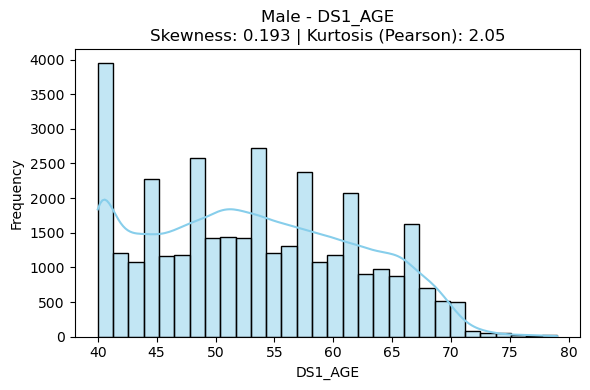

DS1_HIP: Skewness = 0.162, Kurtosis (Pearson) = 4.885


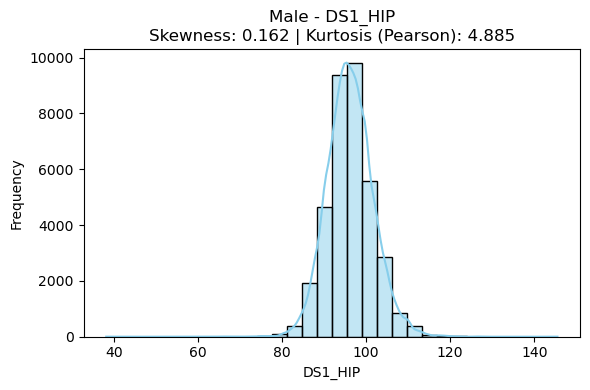

DS1_PULSE: Skewness = 0.624, Kurtosis (Pearson) = 4.543


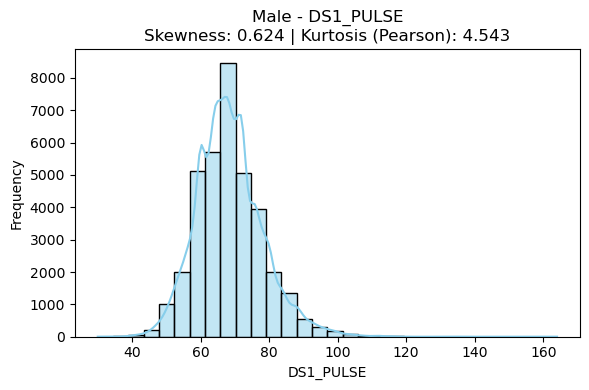

DS1_SBP: Skewness = 0.478, Kurtosis (Pearson) = 3.921


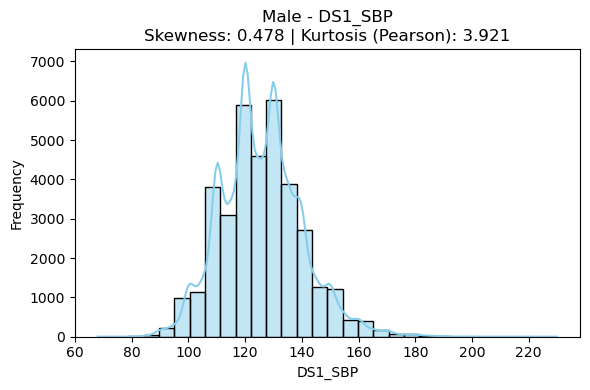

DS1_DBP: Skewness = 0.275, Kurtosis (Pearson) = 3.62


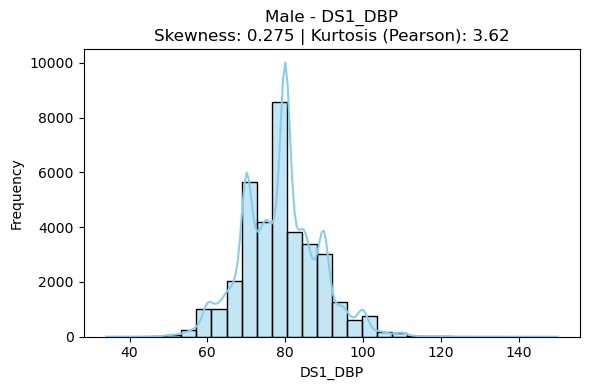

DS1_PBF: Skewness = -0.343, Kurtosis (Pearson) = 3.248


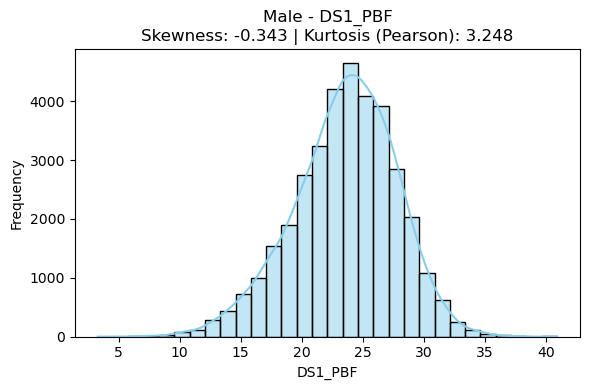

DS1_MUSCLE: Skewness = 0.48, Kurtosis (Pearson) = 4.152


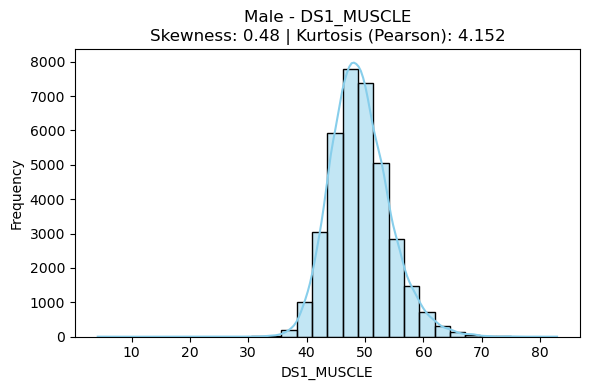

DS1_VISFAT: Skewness = 3.302, Kurtosis (Pearson) = 62.766


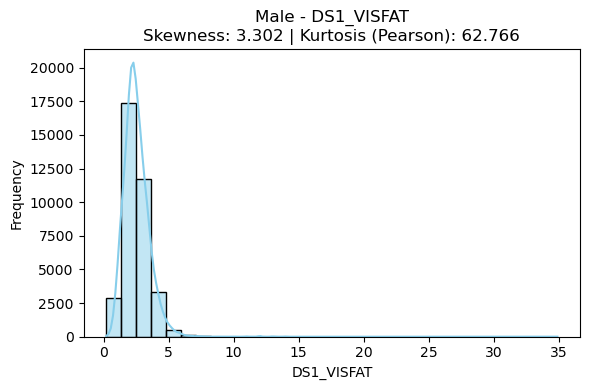

DS1_WHR: Skewness = 0.927, Kurtosis (Pearson) = 27.125


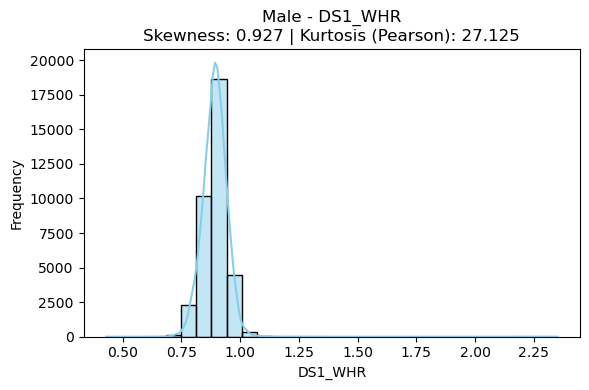

DS1_BMI: Skewness = 0.432, Kurtosis (Pearson) = 3.695


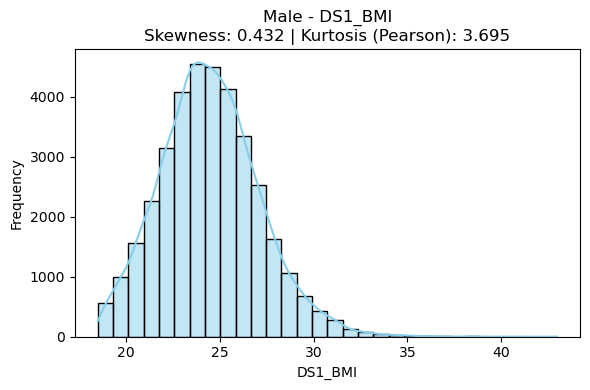


[Female] Distribution Analysis (Kurtosis: Pearson 기준, 정규분포=3)
DS1_AGE: Skewness = 0.302, Kurtosis (Pearson) = 2.313


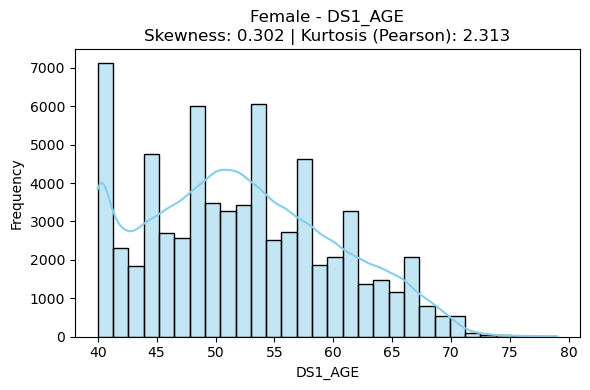

DS1_HIP: Skewness = 0.407, Kurtosis (Pearson) = 5.235


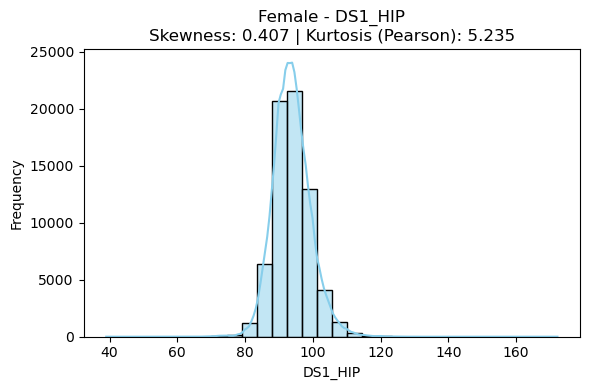

DS1_PULSE: Skewness = 0.678, Kurtosis (Pearson) = 4.878


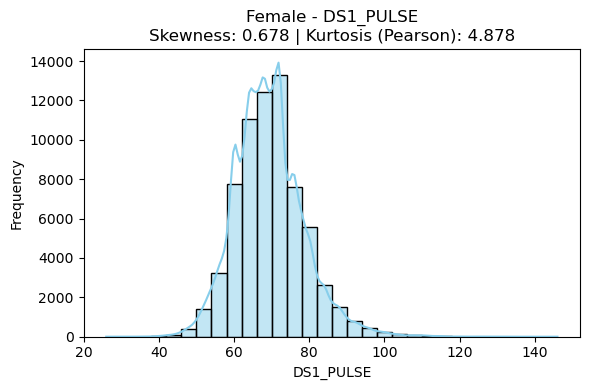

DS1_SBP: Skewness = 0.566, Kurtosis (Pearson) = 3.802


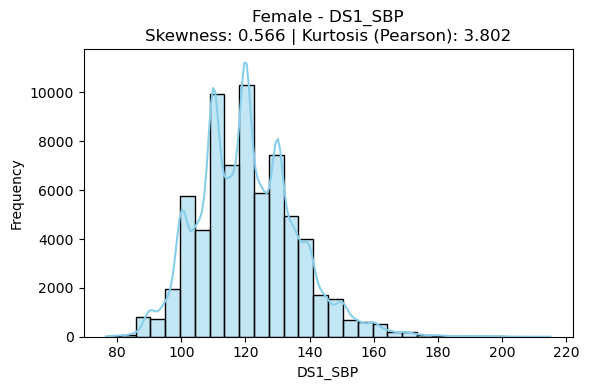

DS1_DBP: Skewness = 0.305, Kurtosis (Pearson) = 3.416


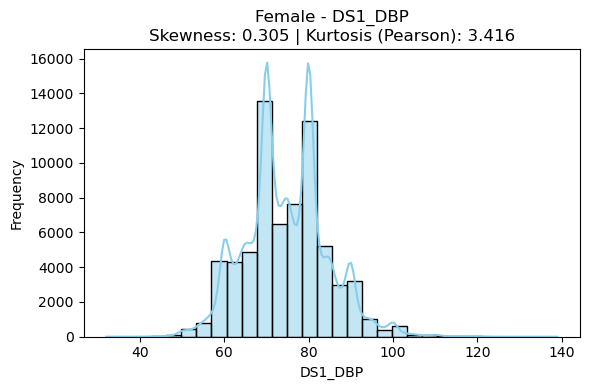

DS1_PBF: Skewness = -0.147, Kurtosis (Pearson) = 3.518


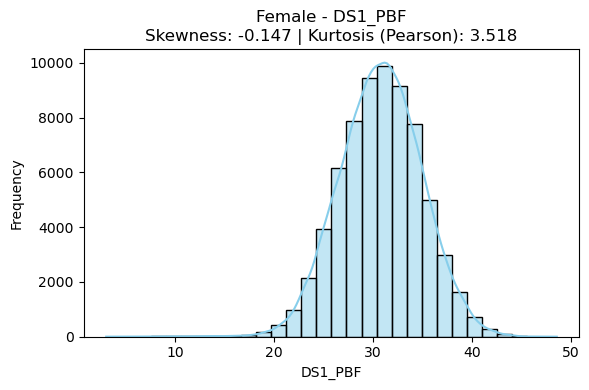

DS1_MUSCLE: Skewness = 0.461, Kurtosis (Pearson) = 4.153


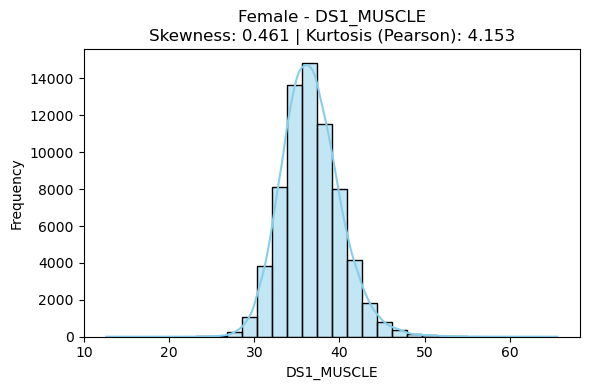

DS1_VISFAT: Skewness = 4.831, Kurtosis (Pearson) = 112.827


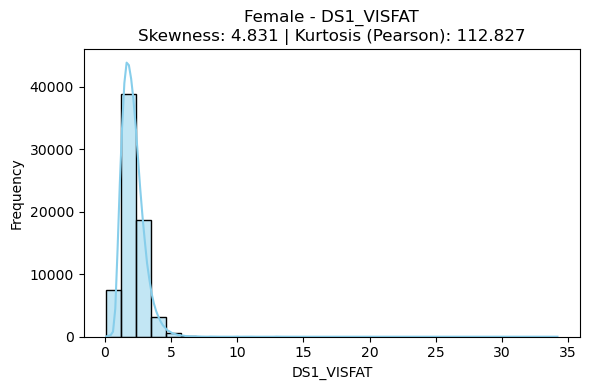

DS1_WHR: Skewness = 0.242, Kurtosis (Pearson) = 3.978


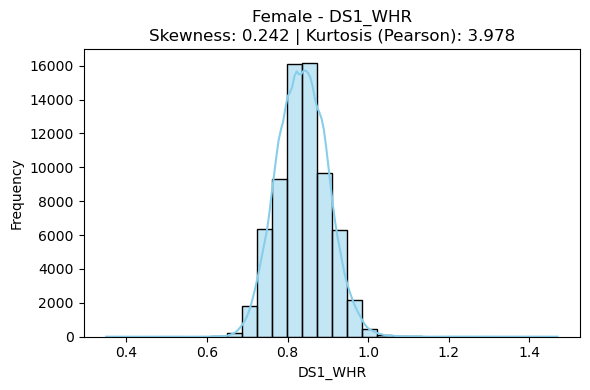

DS1_BMI: Skewness = 0.84, Kurtosis (Pearson) = 4.252


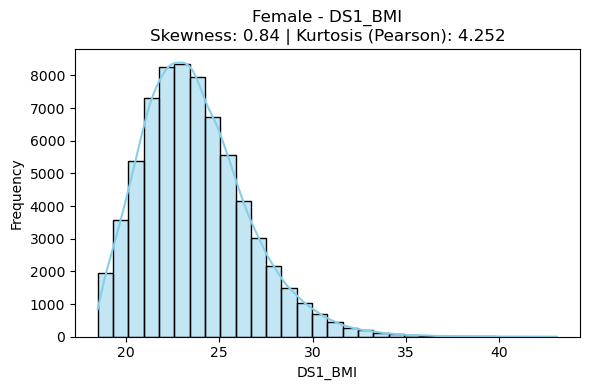

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 파일 읽기
male_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")
female_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 연속형 변수 리스트
continuous_vars = ['DS1_AGE', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
                   'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'DS1_BMI']

# 왜도와 첨도 출력 + 시각화 함수 (Kurtosis 기준: Pearson)
def analyze_distribution(df, label):
    print(f"\n[{label}] Distribution Analysis (Kurtosis: Pearson 기준, 정규분포=3)")
    for var in continuous_vars:
        data = df[var].dropna()
        var_skew = skew(data)
        var_kurt = kurtosis(data, fisher=False)  # Pearson 기준으로 계산

        print(f"{var}: Skewness = {round(var_skew, 3)}, Kurtosis (Pearson) = {round(var_kurt, 3)}")

        # 시각화
        plt.figure(figsize=(6, 4))
        sns.histplot(data, kde=True, bins=30, color='skyblue', edgecolor='black')
        plt.title(f'{label} - {var}\nSkewness: {round(var_skew, 3)} | Kurtosis (Pearson): {round(var_kurt, 3)}')
        plt.xlabel(var)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

# 남성 데이터 분석 및 시각화
analyze_distribution(male_df, "Male")

# 여성 데이터 분석 및 시각화
analyze_distribution(female_df, "Female")

In [9]:
import pandas as pd
from scipy.stats import ttest_ind

# 1. 파일 불러오기
male_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/male_final.csv")

# 2. 연속형 변수 정의
continuous_vars = ['DS1_AGE', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 
                   'DS1_DBP', 'DS1_PBF', 'DS1_MUSCLE','DS1_BMI']

# 3. target=0, 1 그룹으로 나누기
group_0 = male_final_df[male_final_df['target'] == 0]
group_1 = male_final_df[male_final_df['target'] == 1]

# 4. t-test 수행
ttest_results = []

for var in continuous_vars:
    try:
        t_stat, p_val = ttest_ind(group_0[var].dropna(), group_1[var].dropna(), equal_var=False)
        ttest_results.append((var, round(t_stat, 3), round(p_val, 4), p_val < 0.05))
    except Exception as e:
        ttest_results.append((var, None, None, False))

# 5. 결과 DataFrame
ttest_df = pd.DataFrame(ttest_results, columns=['Variable', 'T-statistic', 'p-value', 'Significant (<0.05)'])

# 6. 출력
print("\n=== Independent T-Test 결과 ===")
print(ttest_df.sort_values(by='p-value'))



=== Independent T-Test 결과 ===
     Variable  T-statistic  p-value  Significant (<0.05)
0     DS1_AGE       -7.611      0.0                 True
1     DS1_HIP       -7.531      0.0                 True
2   DS1_PULSE      -12.200      0.0                 True
3     DS1_SBP      -14.359      0.0                 True
4     DS1_DBP       -9.896      0.0                 True
5     DS1_PBF      -18.639      0.0                 True
6  DS1_MUSCLE       -4.371      0.0                 True
7     DS1_BMI      -14.919      0.0                 True


In [11]:
female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 2. 연속형 변수 정의
continuous_vars = ['DS1_AGE' , 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 'DS1_PBF', 'DS1_MUSCLE', 'DS1_WHR', 'DS1_BMI']

# 3. target=0, 1 그룹으로 나누기
group_0 = male_final_df[male_final_df['target'] == 0]
group_1 = male_final_df[male_final_df['target'] == 1]

# 4. t-test 수행
ttest_results = []

for var in continuous_vars:
    try:
        t_stat, p_val = ttest_ind(group_0[var].dropna(), group_1[var].dropna(), equal_var=False)
        ttest_results.append((var, round(t_stat, 3), round(p_val, 4), p_val < 0.05))
    except Exception as e:
        ttest_results.append((var, None, None, False))

# 5. 결과 DataFrame
ttest_df = pd.DataFrame(ttest_results, columns=['Variable', 'T-statistic', 'p-value', 'Significant (<0.05)'])

# 6. 출력
print("\n=== Independent T-Test 결과 ===")
print(ttest_df.sort_values(by='p-value'))


=== Independent T-Test 결과 ===
     Variable  T-statistic  p-value  Significant (<0.05)
0     DS1_AGE       -7.611      0.0                 True
1     DS1_HIP       -7.531      0.0                 True
2   DS1_PULSE      -12.200      0.0                 True
3     DS1_SBP      -14.359      0.0                 True
4     DS1_DBP       -9.896      0.0                 True
5     DS1_PBF      -18.639      0.0                 True
6  DS1_MUSCLE       -4.371      0.0                 True
7     DS1_WHR      -18.696      0.0                 True
8     DS1_BMI      -14.919      0.0                 True
